<a href="https://colab.research.google.com/github/Kondasagar/ZOMATO-RESTAURANT-CLUSTERING-AND-SENTIMENT-ANALYSIS/blob/main/ZOMATO_RESTAURANT_CLUSTERING_AND_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

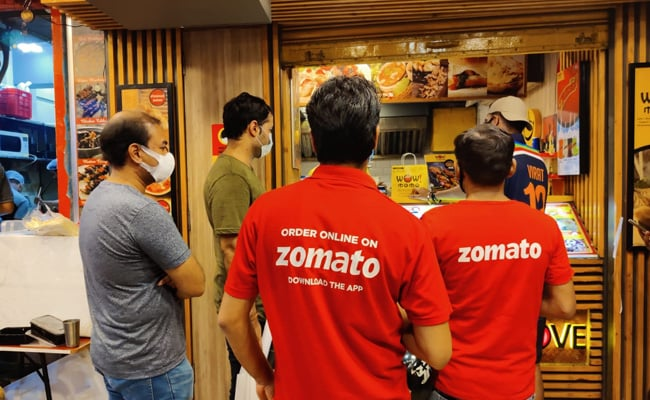

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading the datasets
1. restaaurent names and metadata
2. restaurant reviews

In [23]:
# Importing pandas for datframes manipulation
# Importing numpy for linear algebra (maths) usage on dataset
import pandas as pd
import numpy as np

# visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# suppress all warnings 
import warnings
warnings.filterwarnings("ignore")

In [11]:
names_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/almabetter/Capstone Projects/Zomato Restaurent Clustering/Zomato Restaurant names and Metadata.csv')
# first two rows in names_df
names_df.head(2)

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM


In [12]:
reviews_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/almabetter/Capstone Projects/Zomato Restaurent Clustering/Zomato Restaurant reviews.csv')
# first two rows in reviews dataframe
reviews_df.head(2)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0


In [18]:
# sahpe of dataframes?
print(f"The shape of names_df is {names_df.shape}")
print(f"The shape 0f names_df is {reviews_df.shape}")


The shape of names_df is (105, 6)
The shape 0f names_df is (10000, 7)


In [15]:
# Number of duplicates in both datasets
print(f"The number dupicate rows in names dataset is {names_df.duplicated().sum()}")
print(f"The number dupicate rows in reviews dataset is {reviews_df.duplicated().sum()}")

The number dupicate rows in names dataset is 0
The number dupicate rows in reviews dataset is 36


### Observation:
* All rows in names dataset are unique but there are 36 duplicated rows present in reviews dataset.

#### Removing duplicated rows from reviews dataframe:

In [22]:
# Drop duplicate rows in place
reviews_df.drop_duplicates(inplace=True)
print(f"The shape od reviews_df after removing duplicated rows is {reviews_df.shape}")

The shape od reviews_df after removing duplicated rows is (9964, 7)


In [24]:
# information about data in names_df
names_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


### Observation: 
* There are 50% of nulls in Collections.
* One null value in Timings.

In [25]:
# information about data in reviews_df
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9964 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  9964 non-null   object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    9964 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 622.8+ KB


In [27]:
# null values in each feature
reviews_df.isnull().sum()

Restaurant    0
Reviewer      2
Review        9
Rating        2
Metadata      2
Time          2
Pictures      0
dtype: int64